# 0)

In [1]:
import numpy as np
from scipy import signal
import IPython
from scipy.io import wavfile


# Ensuring my recorded Yes and No files are sampled at 16 kHz frequency
fsty, dataty = wavfile.read('Me_Yes.wav')
xty = dataty[:,0]
nroutsamples = round(len(xty) * 16000/fsty)
#reduces the number of samples to the rounded value
data16 = signal.resample(xty, nroutsamples)
#resamples the original wave file to 16kHz
data16 = np.asarray(data16, dtype=np.int16)
wavfile.write('Badhesa_Yes_16kHz.wav',16000,data16)

fsty1, dataty1 = wavfile.read('Me_No.wav')
xty1 = dataty1[:,0]
nroutsamples1 = round(len(xty1) * 16000/fsty1)
#reduces the number of samples to the rounded value
data161 = signal.resample(xty1, nroutsamples1)
#resamples the original wave file to 16kHz
data161 = np.asarray(data161, dtype=np.int16)
wavfile.write('Badhesa_No_16kHz.wav',16000,data161)

In [2]:
IPython.display.Audio("Badhesa_No_16kHz.wav")

In [3]:
IPython.display.Audio("Badhesa_Yes_16kHz.wav")

# 1 a)

In [125]:
# Importing Tyron's wav file of with beep

IPython.display.Audio("Tyron_beep_fox.wav")
fs1, data = wavfile.read("Tyron_beep_fox.wav") #fs is the sampling rate
A1 = data[:] # Left Channel
#print(A1[0:129])


IPython.display.Audio("Tyron_beep_fox.wav")

# 1 b)

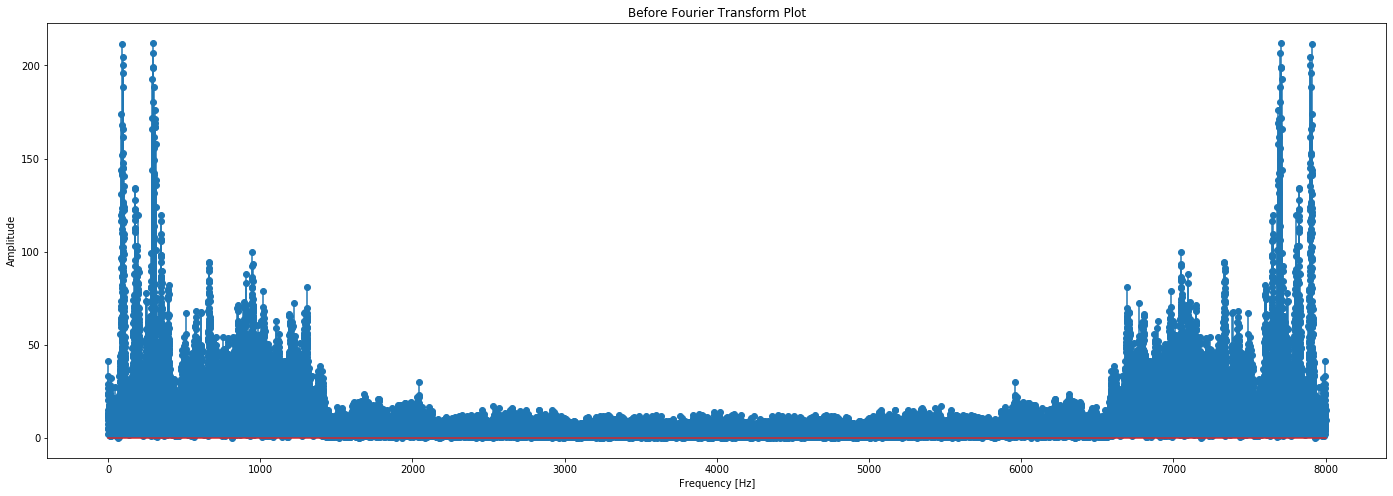

In [5]:
import matplotlib.pyplot as plt

# The FFT of the Beeping Tyron File

fft = np.fft.fft(A1) #xsamp is your stem plot data
N = len(A1)
Tsamp=1/fs1
f = np.linspace(0, 1 / Tsamp, N)
#Tsamp is the rate you sampled at (30 Hz, 12 Hz, 10 Hz, 7 Hz)
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Before Fourier Transform Plot")
plt.stem(f,np.abs(fft)/N,use_line_collection=True)
plt.show()

# 1 c)

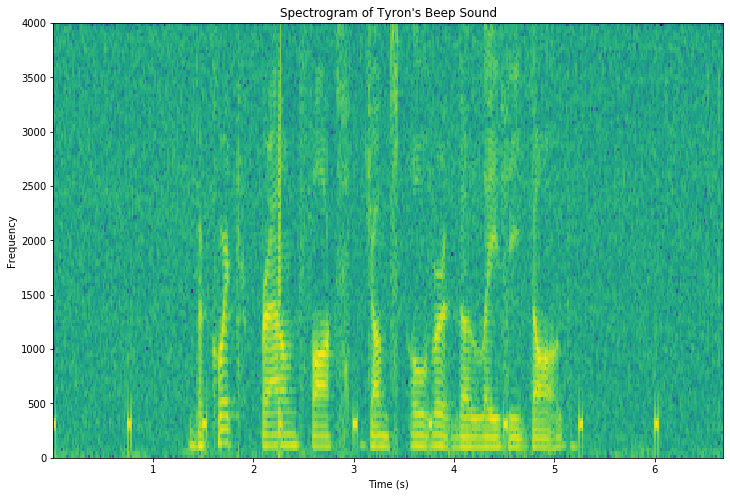

In [6]:
# Spectrogram of Tyron's wave file data to better see the reoccuring beep

plt.figure(figsize=(12,8))
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title("Spectrogram of Tyron's Beep Sound")
spec1=plt.specgram(A1, Fs=fs1)

plt.show()

# After figuring out how to read a spectrogram, it became evident that the dft varying with time
# displayed a repeating sound. The sound occuring between 250-400 Hz roughly.

# 1 d)  e)  f)

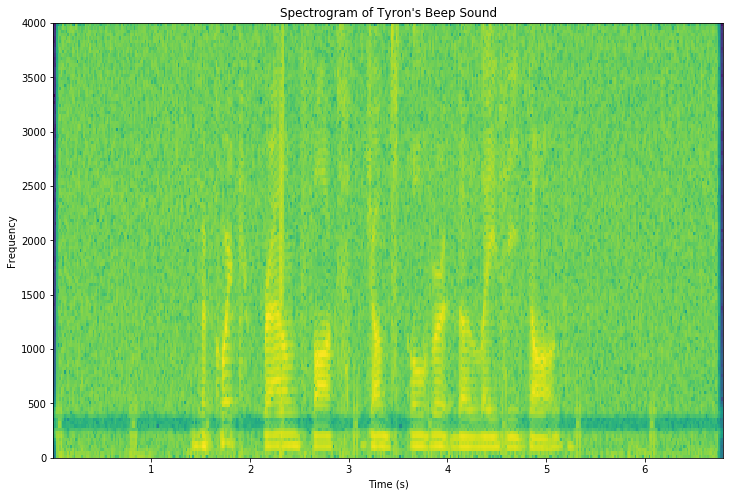

In [126]:
# Following question 6 from WS7, I decided to use a Hamming wondow to apply a band stop. The firBS generates the sum
# of "hlow" and "hhigh" array from the worksheet

def firBS(fs, f1a, f2a, tw):
    f1= f1a+tw/2
    f2= ((fs/2)-f2a)+tw/2
    N=int(3.44*fs/tw)
    n=int(N/2)
    O1= 2*np.pi*f1/fs
    O2= 2*np.pi*f2/fs
    hBS=[0.]*N
    h=1/1000000000000
    for i in range(-n,n):
        if i==0:
            hBS[i+n]=1-(((np.sin(i*O2)/(i*np.pi+h))*np.cos(i*np.pi))+(np.sin(i*O1)/(i*np.pi+h)))*(0.54+0.46*np.cos((2*np.pi*i)/(N-1)))
        else:
            hBS[i+n]=(((np.sin(i*O2)/(i*np.pi))*np.cos(i*np.pi))+(np.sin(i*O1)/(i*np.pi)))*(0.54+(0.46*np.cos((2*np.pi*i)/(N-1))))
    return hBS

# Generating the filter kernels using stop band frequencies 200-420 Hz, trying to account of the transition width of around
# 30 Hz
filt=firBS(fs1,200,420,30)
#print(fs1,len(filt))
#plt.plot(filt)
#plt.show()



filtered =np.convolve(A1,filt)

plt.figure(figsize=(12,8))
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title("Spectrogram of Tyron's Beep Sound")
spec2=plt.specgram(filtered, Fs=fs1)

plt.show()

filtered_out = np.asarray(filtered, dtype=np.int16)
wavfile.write('beepGone.wav',fs1,filtered_out)

IPython.display.Audio("beepGone.wav")

# 2 a)

Unvoiced consonants (s, f, t, p) have a higher strength in the higher frequency range of our vocal range as this article cited sugguests. This could be a reason why the YES has a higher power spectral than the NO in the higher frequency range of f>4000 Hz. 






https://www.ecophon.com/en/about-ecophon/acoustic-knowledge/basic-acoustics/generating-and-understanding-speech/#:~:text=Normal%20hearing,the%20range%20250%20%E2%80%93%204%2C000%20Hz.&text=vary%20considerably%20in%20strength%20and,frequency%20range%202%2C000%20%E2%80%93%208%2C000%20Hz.

# 2 b)

In [10]:
# Importing data of classmates Yes and No wav files

fs, data21 = wavfile.read("Ernie_No_16kHz.wav") #fs is the sampling rate
A21 = data21[:] # Left Channel


fs, data22 = wavfile.read("Ernie_Yes_16kHz.wav") #fs is the sampling rate
A22 = data22[:] # Left Channel


fs, data23 = wavfile.read("Mcclennon_No_16kHz.wav") #fs is the sampling rate
A23 = data23[:] # Left Channel


fs, data24 = wavfile.read("Mcclennon_Yes_16kHz.wav") #fs is the sampling rate
A24 = data24[:] # Left Channel


fs, data25 = wavfile.read("NewNo_Psajd_16kHz.wav") #fs is the sampling rate
A25 = data25[:] # Left Channel


fs, data26 = wavfile.read("NewYes_Psajd_16kHz.wav") #fs is the sampling rate
A26 = data26[:] # Left Channel


fs, data27 = wavfile.read("Shum_No_16kHz.wav") #fs is the sampling rate
A27 = data27[:] # Left Channel


fs, data28 = wavfile.read("Shum_Yes_16kHz.wav") #fs is the sampling rate
A28 = data28[:] # Left Channel


fs, data29 = wavfile.read("Tsui_No_16kHz.wav") #fs is the sampling rate
A29 = data29[:] # Left Channel


fs, data210 = wavfile.read("Tsui_Yes_16kHz.wav") #fs is the sampling rate
A210 = data210[:] # Left Channel


fs, data211 = wavfile.read("William_No_16kHz.wav") #fs is the sampling rate
A211 = data211[:] # Left Channel


fs, data212 = wavfile.read("William_Yes_16kHz.wav") #fs is the sampling rate
A212 = data212[:] # Left Channel



fs, data213 = wavfile.read("Yakovlev_No_16kHz.wav") #fs is the sampling rate
A213 = data213[:] # Left Channel


fs, data214 = wavfile.read("Yakovlev_Yes_16kHz.wav") #fs is the sampling rate
A214 = data214[:] # Left Channel



<Figure size 864x576 with 0 Axes>

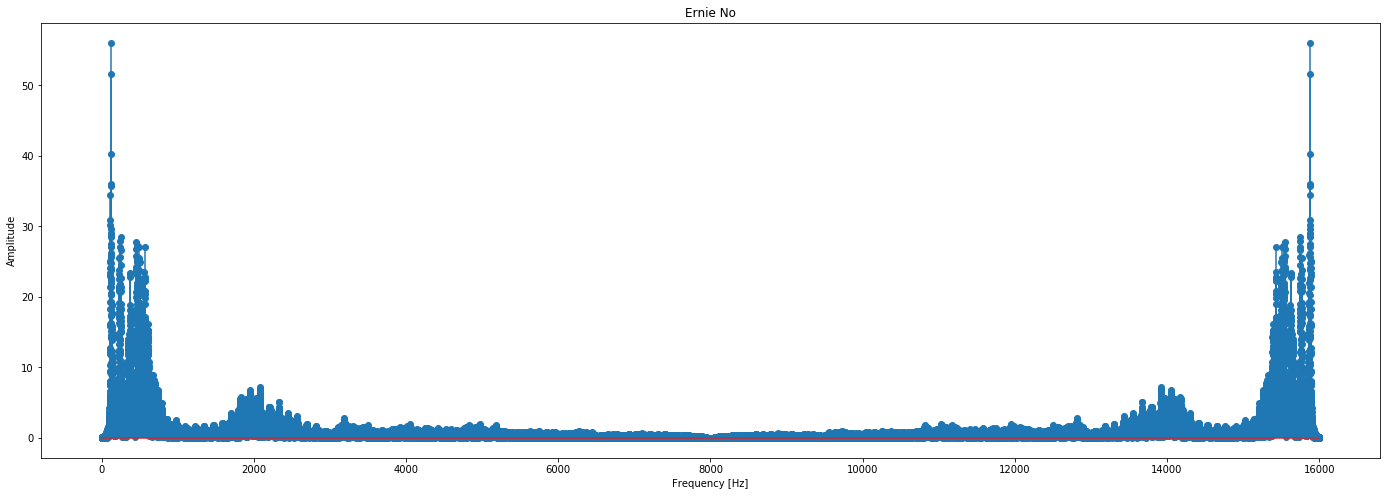

<Figure size 864x576 with 0 Axes>

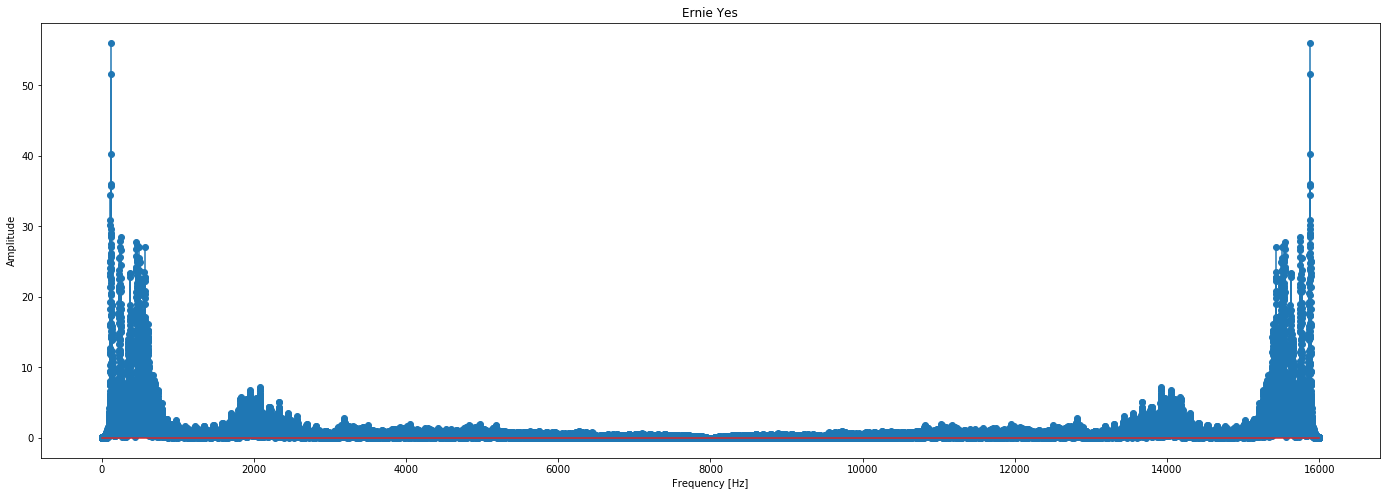

<Figure size 864x576 with 0 Axes>

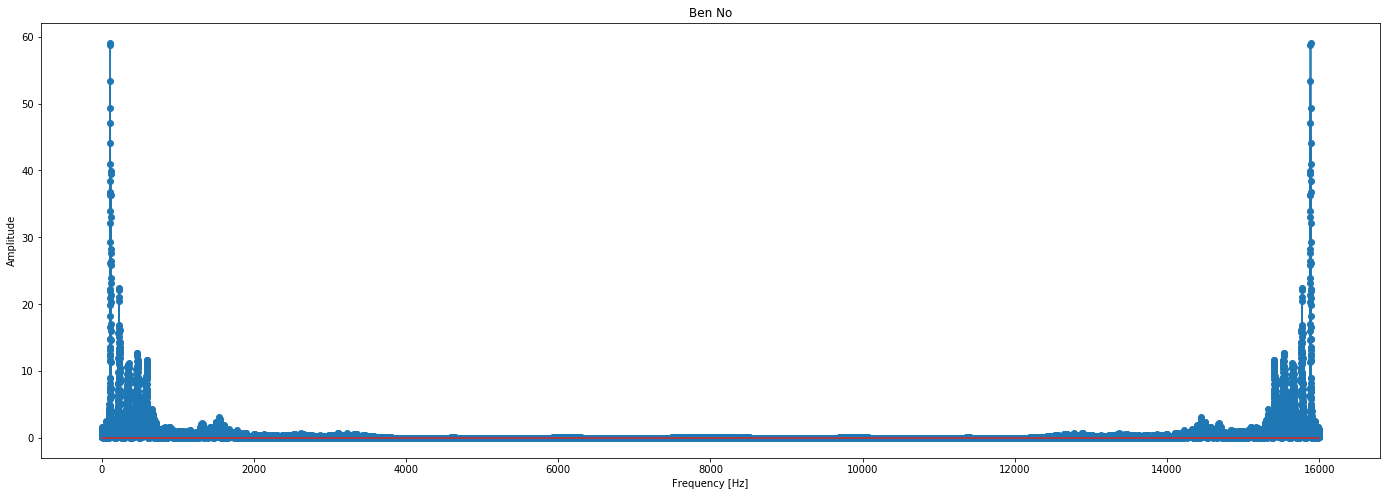

<Figure size 864x576 with 0 Axes>

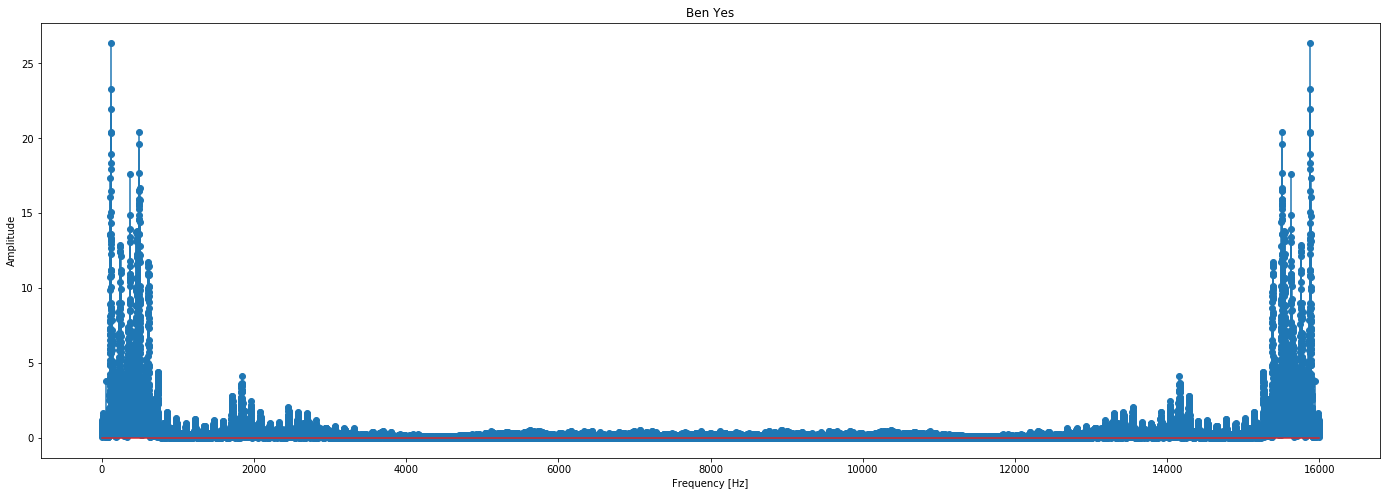

In [127]:
# Realized that the Yes and No have different amplitudes in the frequenciy ranges so in order to find something that
# differeniates them we would need to use the ffts, which are done below for all imported above

N21 = len(A21)
Tsamp21=1/fs
f21 = np.linspace(0, 1 / Tsamp21, N21)

plt.figure(figsize=(12,8))
fft21 = np.fft.fft(A21) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Ernie No")
plt.stem(f21,np.abs(fft21)/N21,use_line_collection=True)
plt.show()

N22 = len(A22)
Tsamp21=1/fs
f22 = np.linspace(0, 1 / Tsamp21, N22)

plt.figure(figsize=(12,8))
fft22 = np.fft.fft(A22) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Ernie Yes")
plt.stem(f22,np.abs(fft22)/N22,use_line_collection=True)
plt.show()

N23 = len(A23)
Tsamp21=1/fs
f23 = np.linspace(0, 1 / Tsamp21, N23)

plt.figure(figsize=(12,8))
fft23 = np.fft.fft(A23) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Ben No")
plt.stem(f23,np.abs(fft23)/N23,use_line_collection=True)
plt.show()

N24 = len(A24)
Tsamp21=1/fs
f24 = np.linspace(0, 1 / Tsamp21, N24)

plt.figure(figsize=(12,8))
fft24 = np.fft.fft(A24) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Ben Yes")
plt.stem(f24,np.abs(fft24)/N24,use_line_collection=True)
plt.show()



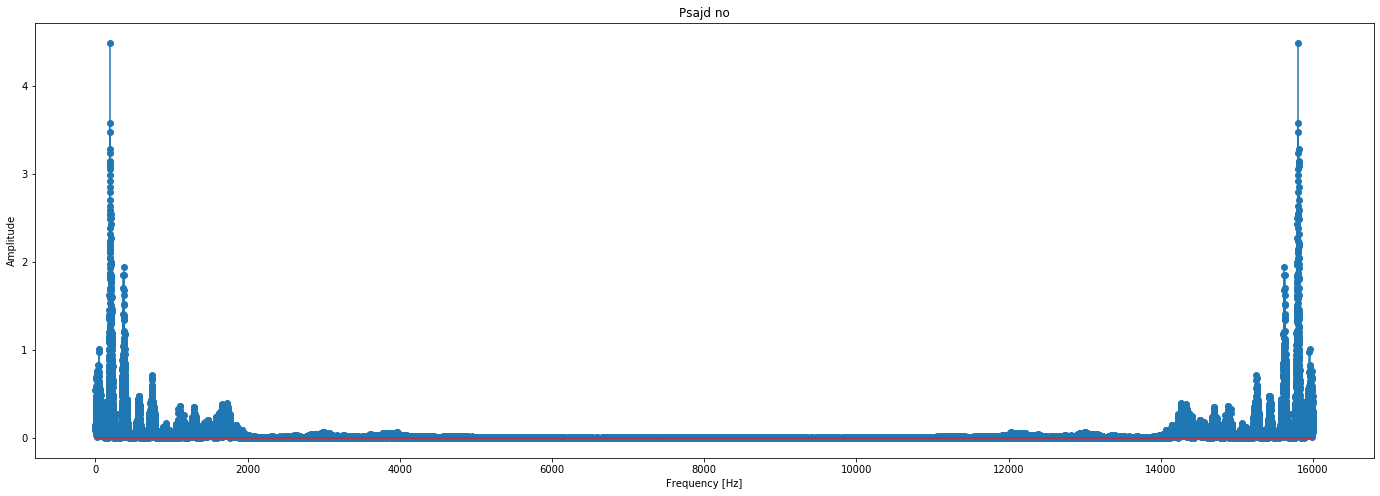

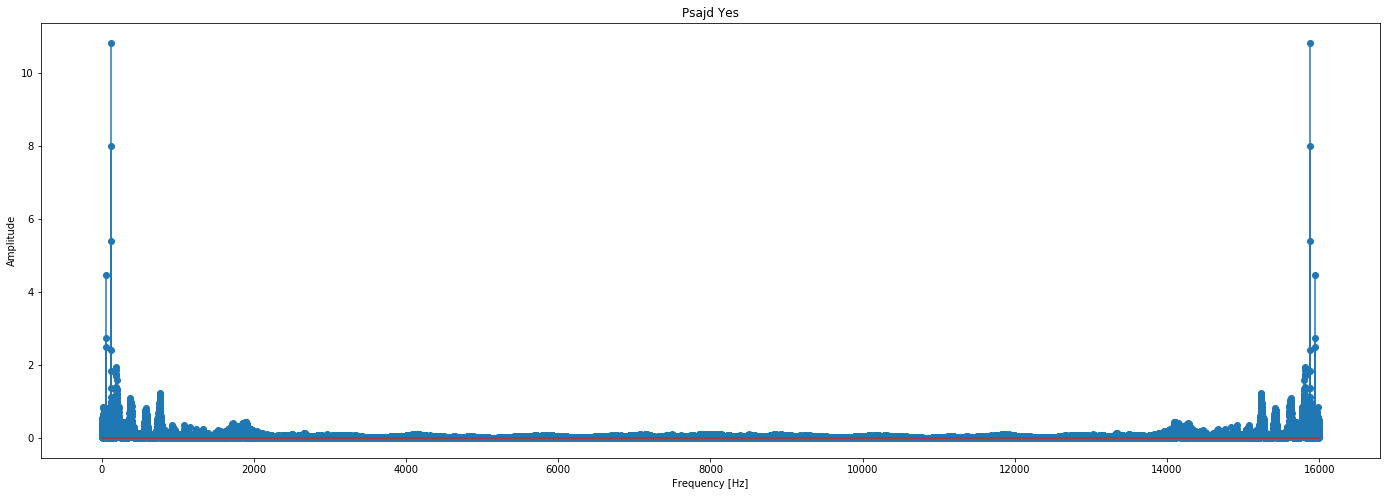

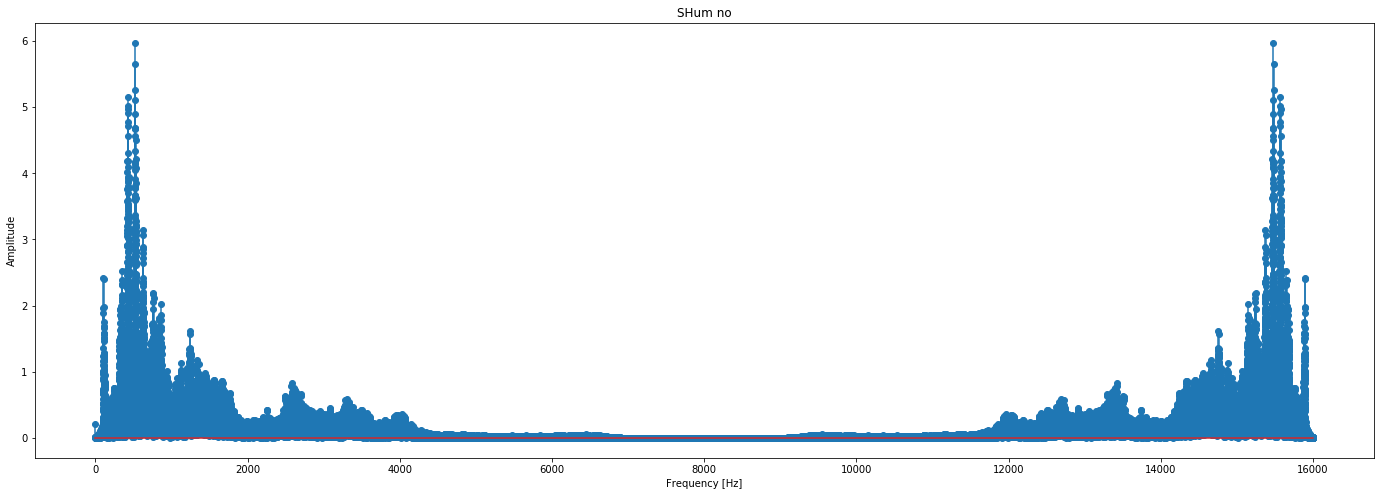

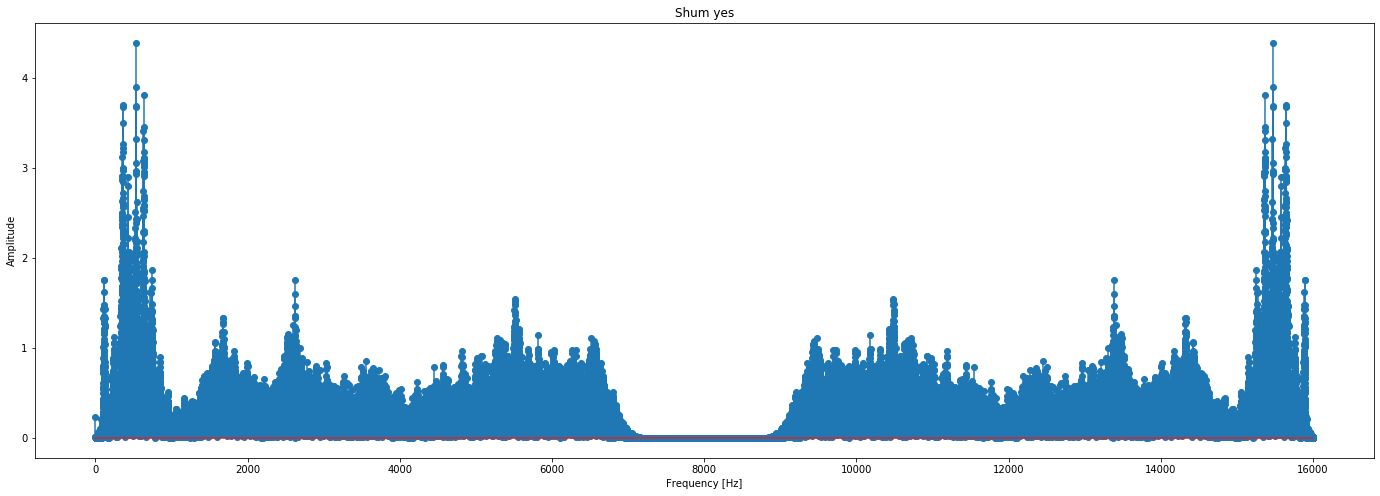

In [13]:
N25 = len(A25)
Tsamp21=1/fs
f25 = np.linspace(0, 1 / Tsamp21, N25)

fft25 = np.fft.fft(A25) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Psajd no")
plt.stem(f25,np.abs(fft25)/N25,use_line_collection=True)
plt.show()

N26 = len(A26)
Tsamp21=1/fs
f26 = np.linspace(0, 1 / Tsamp21, N26)

fft26 = np.fft.fft(A26) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Psajd Yes")
plt.stem(f26,np.abs(fft26)/N26,use_line_collection=True)
plt.show()

N27 = len(A27)
Tsamp21=1/fs
f27 = np.linspace(0, 1 / Tsamp21, N27)

fft27 = np.fft.fft(A27) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("SHum no")
plt.stem(f27,np.abs(fft27)/N27,use_line_collection=True)
plt.show()

N28 = len(A28)
Tsamp21=1/fs
f28 = np.linspace(0, 1 / Tsamp21, N28)

fft28 = np.fft.fft(A28) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Shum yes")
plt.stem(f28,np.abs(fft28)/N28,use_line_collection=True)
plt.show()



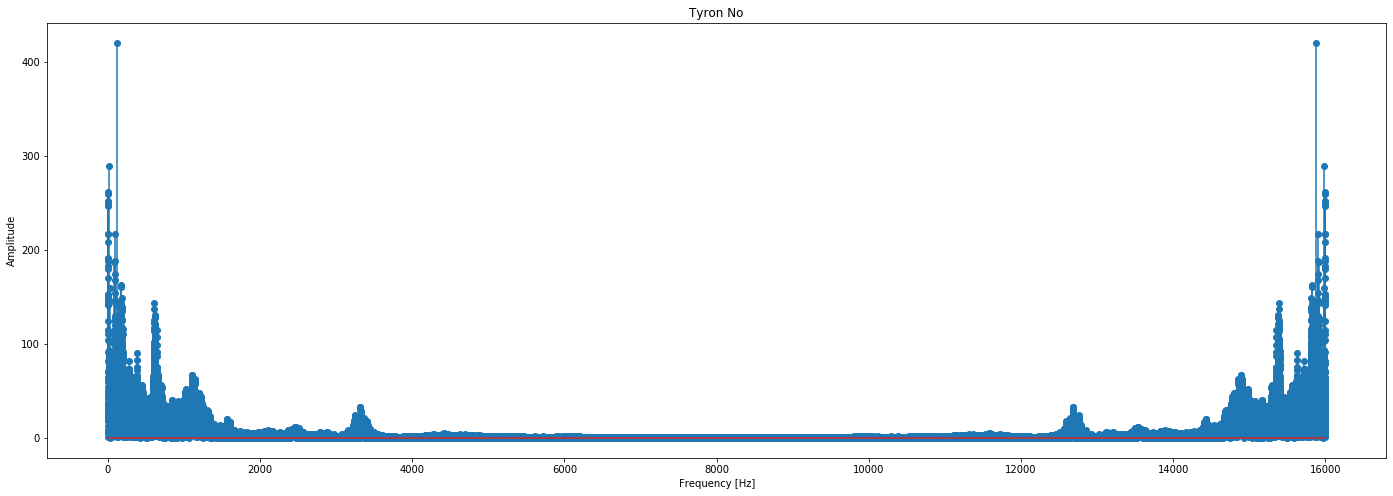

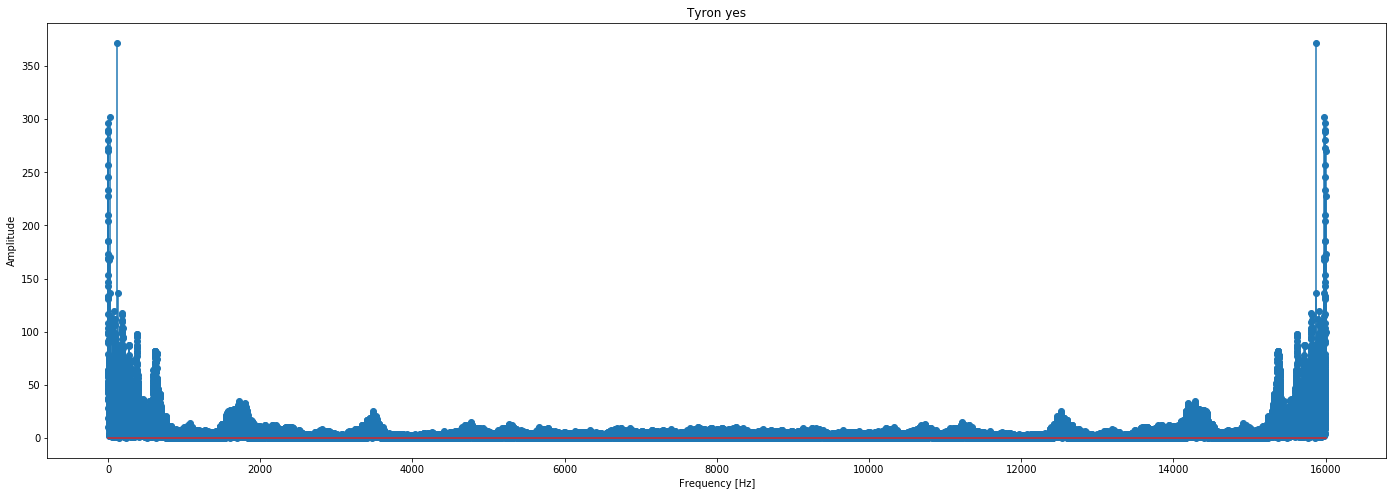

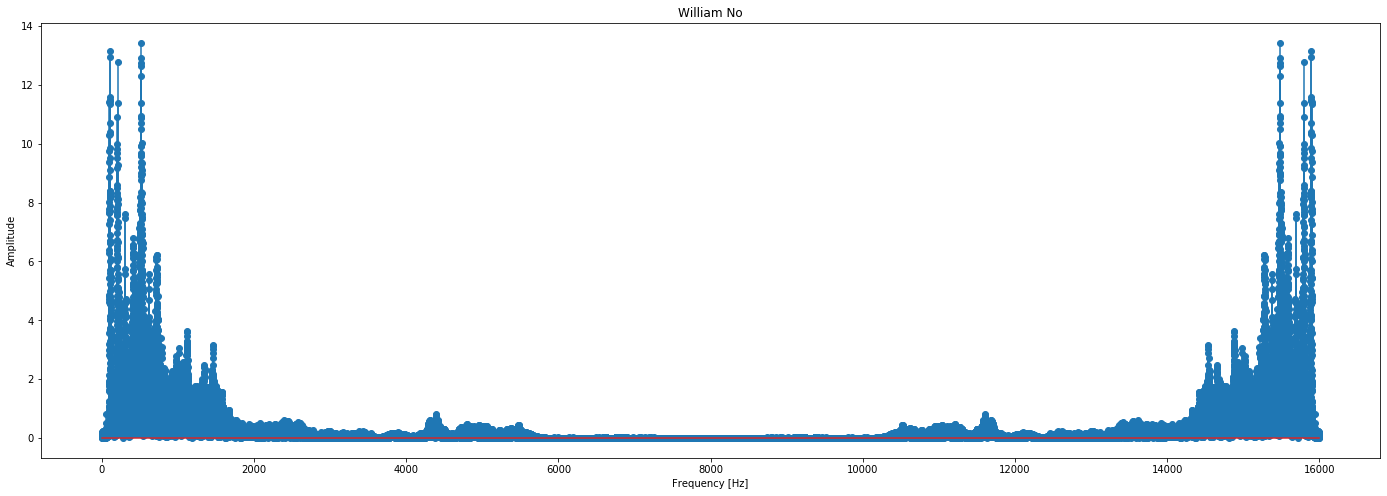

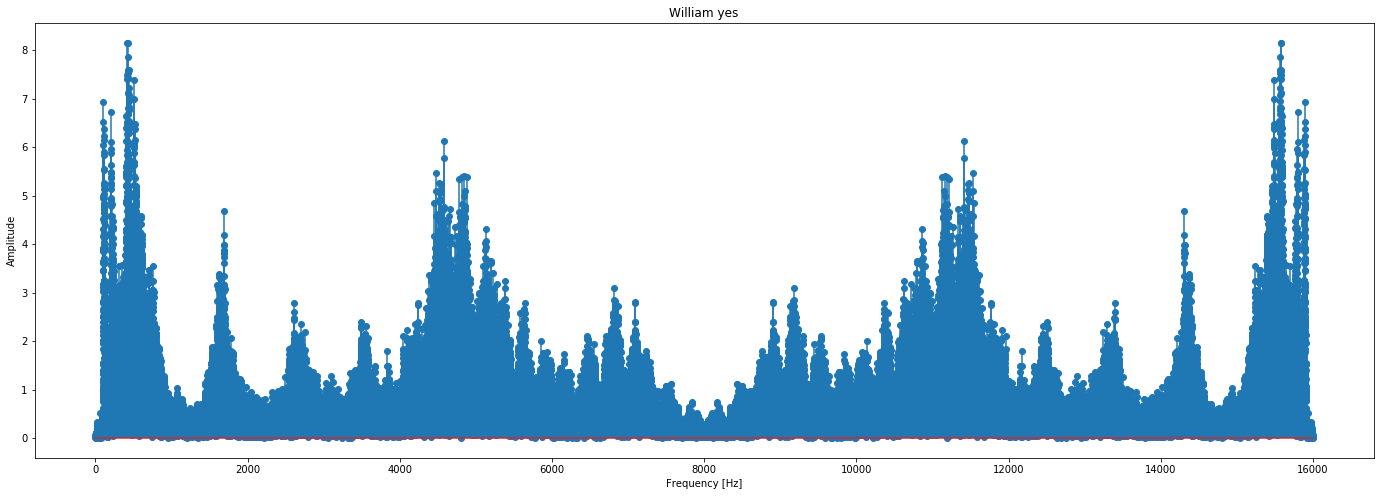

In [14]:
N29 = len(A29)
Tsamp21=1/fs
f29 = np.linspace(0, 1 / Tsamp21, N29)

fft29 = np.fft.fft(A29) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Tyron No")
plt.stem(f29,np.abs(fft29)/N29,use_line_collection=True)
plt.show()

N210 = len(A210)
Tsamp21=1/fs
f210 = np.linspace(0, 1 / Tsamp21, N210)

fft210 = np.fft.fft(A210) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Tyron yes")
plt.stem(f210,np.abs(fft210)/N210,use_line_collection=True)
plt.show()

N211 = len(A211)
Tsamp21=1/fs
f211 = np.linspace(0, 1 / Tsamp21, N211)

fft211 = np.fft.fft(A211) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("William No")
plt.stem(f211,np.abs(fft211)/N211,use_line_collection=True)
plt.show()

N212 = len(A212)
Tsamp21=1/fs
f212 = np.linspace(0, 1 / Tsamp21, N212)

fft212 = np.fft.fft(A212) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("William yes")
plt.stem(f212,np.abs(fft212)/N212,use_line_collection=True)
plt.show()


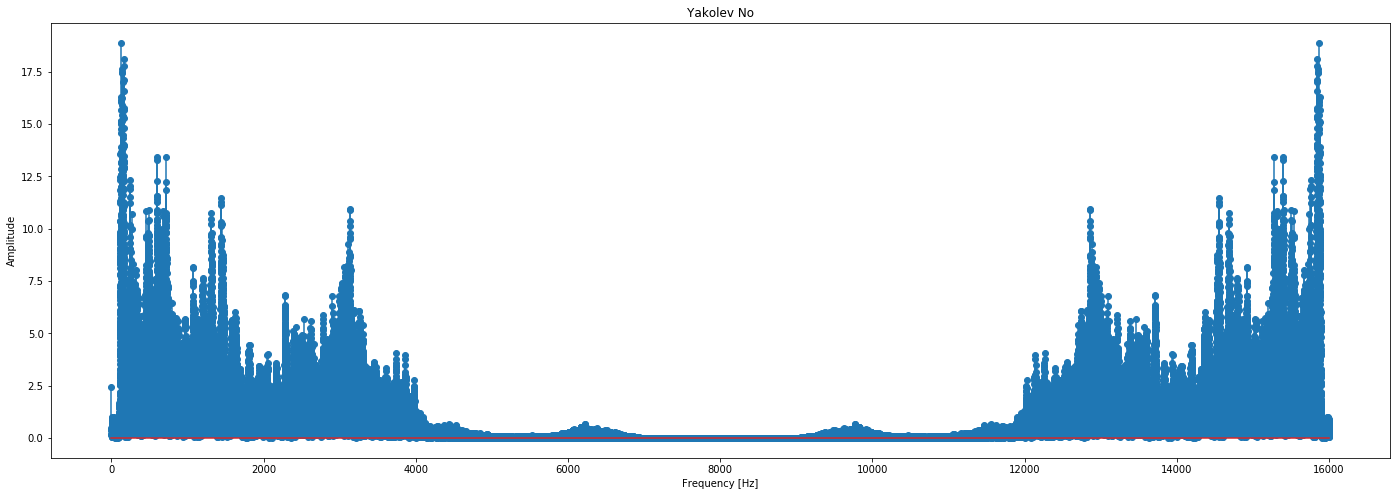

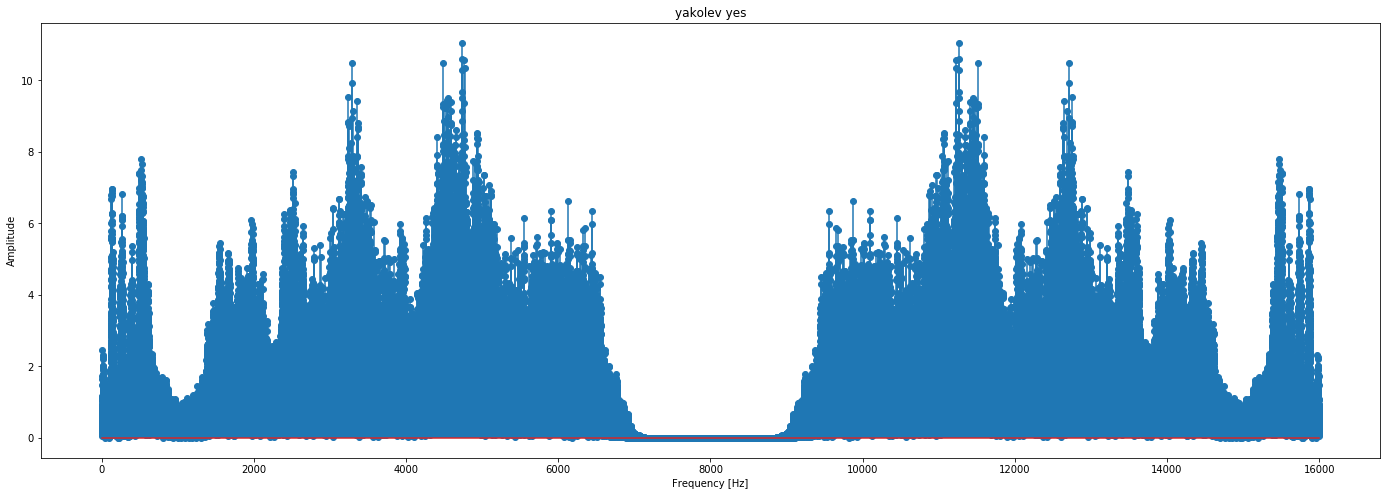

In [15]:

N213 = len(A213)
Tsamp21=1/fs
f213 = np.linspace(0, 1 / Tsamp21, N213)

fft213 = np.fft.fft(A213) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Yakolev No")
plt.stem(f213,np.abs(fft213)/N213,use_line_collection=True)
plt.show()

N214 = len(A214)
Tsamp21=1/fs
f214 = np.linspace(0, 1 / Tsamp21, N214)

fft214 = np.fft.fft(A214) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("yakolev yes")
plt.stem(f214,np.abs(fft214)/N214,use_line_collection=True)
plt.show()

In [123]:
# the function that takes an input and returns whether Yes or No was said
def yesNo(list1):
    N=len(list1)
    
    
    # N/16000 is the ratio that finds the index of the frequency in the fft when multiplied by
    # the desired frequency
    n1=int(600*N/16000)     
    n2=int(1700*N/16000)
    n3=int(5500*N/16000)
    n4=int(7000*N/16000)
    
    # Using the sum of a range of frequencies (600-1700 Hz and 5500-7000 Hz), we could differ the Yes and No
    
    sum1=sum(np.abs(list1[n1:n2]))
    sum2=sum(np.abs(list1[n3:n4]))
    
    
    # Can use this ratio> 4.28 gives No but my initial method of percent difference ended up working
    
    ratio=sum1/sum2
    
    
    # I decided to use the percent difference between the sum of 
    
    percentDiff=((sum1-sum2)/((sum1+sum2)/2))
    if percentDiff> 1.28 :
        print("They said No")
    else: 
        print("They said Yes")
    
    return ratio, percentDiff


# testing out the values that get generated by the function to find the best fit

yes1=yesNo(fft21)
yes2=yesNo(fft22)
yes3=yesNo(fft23)
yes4=yesNo(fft24)
yes5=yesNo(fft25)
yes6=yesNo(fft26)
yes7=yesNo(fft27)
yes8=yesNo(fft28)
yes9=yesNo(fft29)
yes10=yesNo(fft210)
yes11=yesNo(fft211)
yes12=yesNo(fft212)
yes13=yesNo(fft213)
yes14=yesNo(fft214)




print(yes1[0],yes3[0],yes5[0],yes7[0],yes9[0],yes11[0],yes13[0])
print(yes2[0],yes4[0],yes6[0],yes8[0],yes10[0],yes12[0],yes14[0])

print(yes1[1],yes3[1],yes5[1],yes7[1],yes9[1],yes11[1],yes13[1])
print(yes2[1],yes4[1],yes6[1],yes8[1],yes10[1],yes12[1],yes14[1])

They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
151.75945506888533 16.689144046342395 19.405398098327392 27.611425297813845 22.047156547133493 45.92845494693311 21.18916295503511
3.3394970067100047 2.5927082393224135 2.8049316841546923 0.7016537296603859 1.9789399089055302 0.8091332442879091 0.49378542071698833
1.9738150414441042 1.7738726085603285 1.8039734397376022 1.8601957099877289 1.8264427981898919 1.9147638675826169 1.8197318209746922
1.0782341838662528 0.8866337777669355 0.948732767881838 -0.35065450172304774 0.6572404538802498 -0.21100353588076123 -0.6777607710751902


# 2 c)

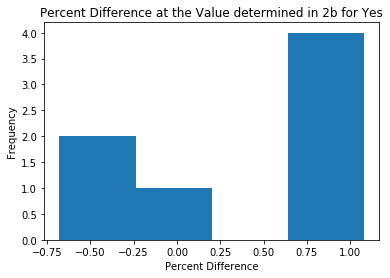

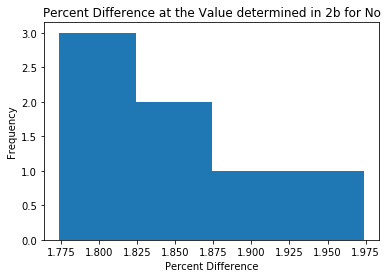

In [134]:
# histogram of the percent difference at the value chosen
yes= [yes2[1],yes4[1],yes6[1],yes8[1],yes10[1],yes12[1],yes14[1]]
no=[yes1[1],yes3[1],yes5[1],yes7[1],yes9[1],yes11[1],yes13[1]]

plt.hist(yes, bins='auto') # Quick histogram with settings on 'auto'
plt.xlabel('Percent Difference')
plt.ylabel('Frequency')
plt.title('Percent Difference at the Value determined in 2b for Yes')
plt.show()


plt.hist(no, bins='auto') # Quick histogram with settings on 'auto'
plt.xlabel('Percent Difference')
plt.ylabel('Frequency')
plt.title('Percent Difference at the Value determined in 2b for No')
plt.show()


# As I can clearly see that there is a clear difference between the maximum value of the Yes percent difference of 1.10 bin
# and the No has a minimum f 1.775 bin. Although they are two different histograms, it was easier to see them this way, it
# is evident that there is a visible difference at the chosen value 

# 2 d)

<Figure size 864x576 with 0 Axes>

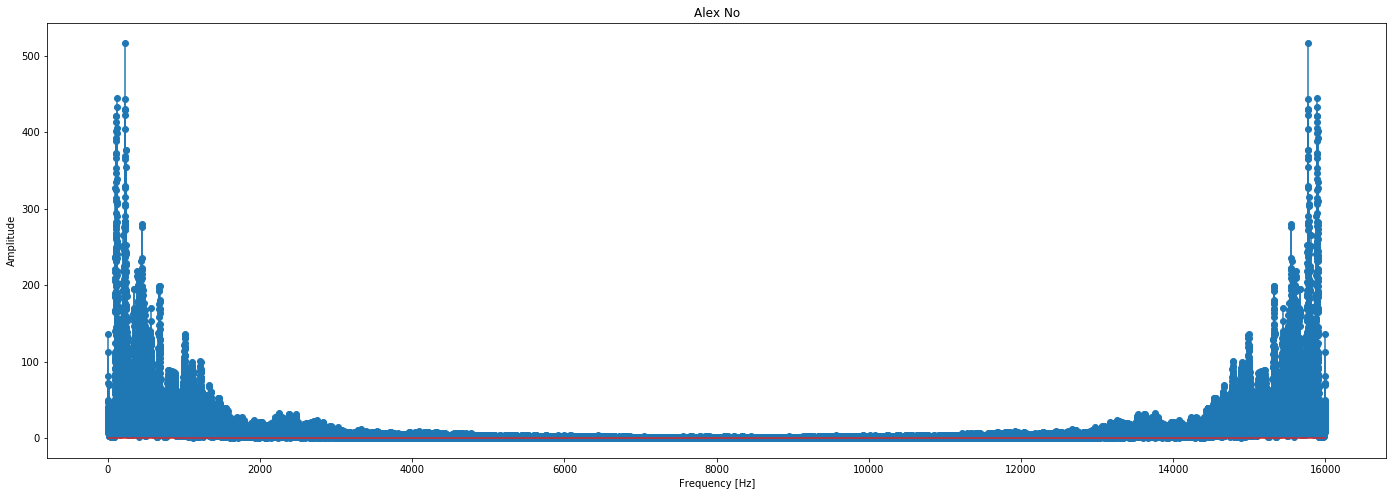

<Figure size 864x576 with 0 Axes>

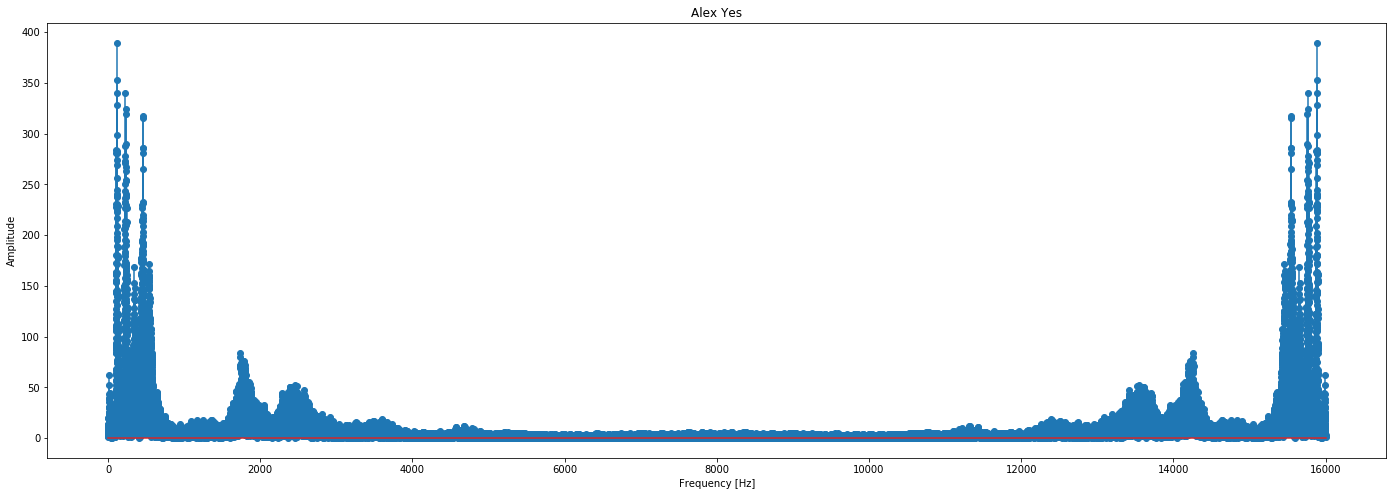

<Figure size 864x576 with 0 Axes>

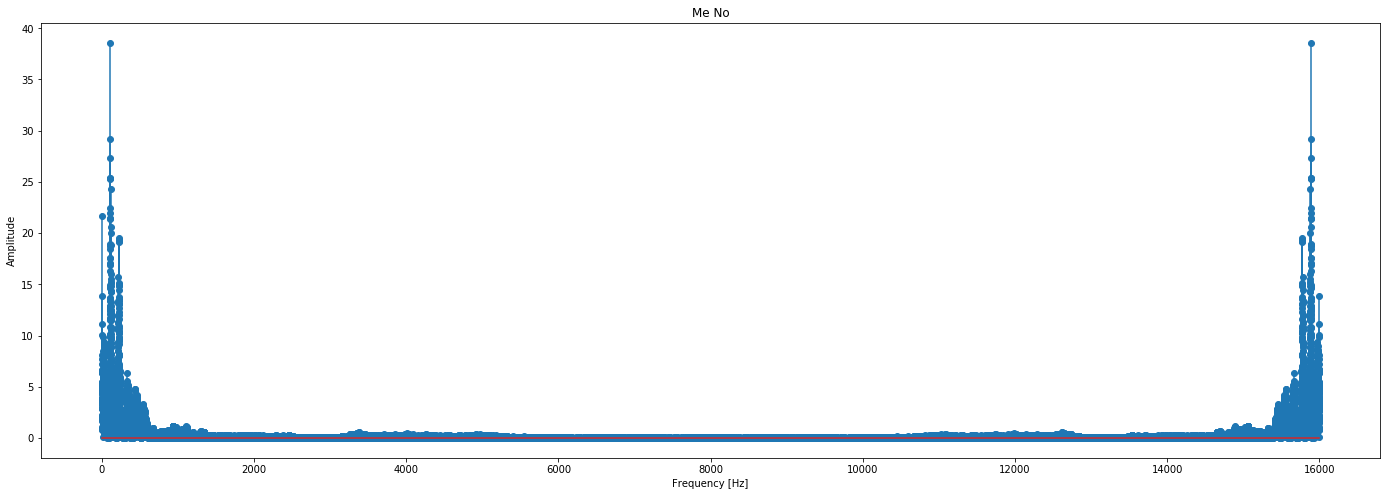

<Figure size 864x576 with 0 Axes>

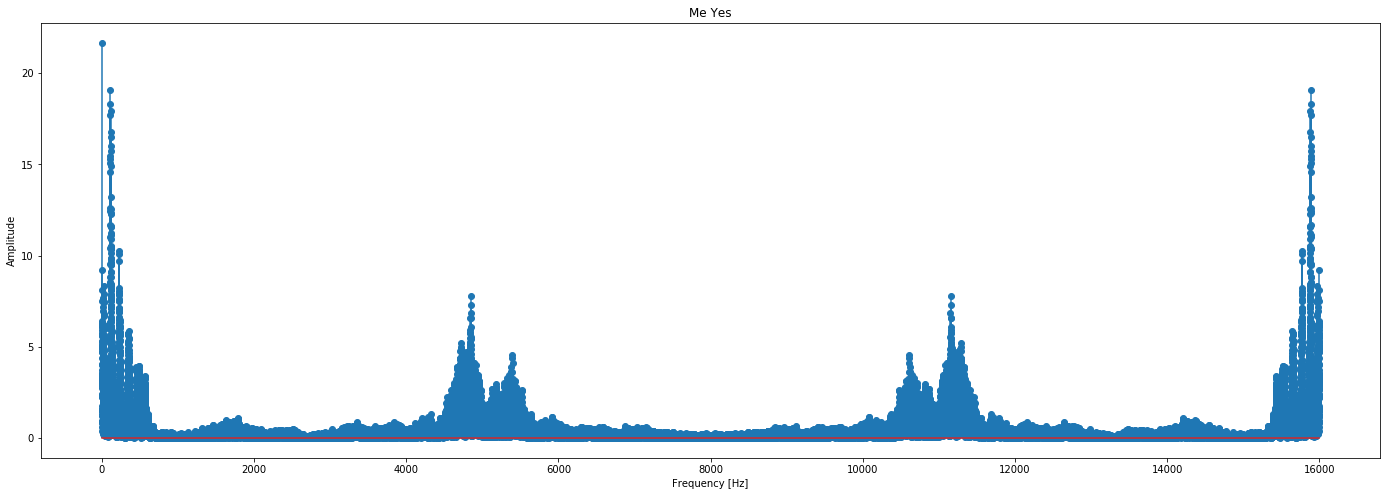

In [99]:
# Importing the data for testing

fs, data215 = wavfile.read("AChen_No_16kHz.wav") #fs is the sampling rate
A215 = data215[:] # Left Channel

fs, data216 = wavfile.read("AChen_Yes_16kHz.wav") #fs is the sampling rate
A216 = data216[:] # Left Channel

fs, data217 = wavfile.read("Badhesa_No_16kHz.wav") #fs is the sampling rate
A217 = data217[:] # Left Channel

fs, data218 = wavfile.read("Badhesa_Yes_16kHz.wav") #fs is the sampling rate
A218 = data218[:] # Left Channel

fs, data219 = wavfile.read("Duong_No_16kHz.wav") #fs is the sampling rate
A219 = data219[:] # Left Channel

fs, data220 = wavfile.read("Duong_Yes_16kHz.wav") #fs is the sampling rate
A220 = data220[:] # Left Channel

fs, data221 = wavfile.read("Jonathon_No_16kHz.wav") #fs is the sampling rate
A221 = data221[:] # Left Channel

fs, data222 = wavfile.read("Jonathon_Yes_16kHz.wav") #fs is the sampling rate
A222 = data222[:] # Left Channel

fs, data223 = wavfile.read("Langford_No_16kHz.wav") #fs is the sampling rate
A223 = data22[:] # Left Channel

fs, data224 = wavfile.read("Langford_Yes_16kHz.wav") #fs is the sampling rate
A224 = data224[:] # Left Channel

N215 = len(A215)
Tsamp21=1/fs
f215 = np.linspace(0, 1 / Tsamp21, N215)

plt.figure(figsize=(12,8))
fft215 = np.fft.fft(A215) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Alex No")
plt.stem(f215,np.abs(fft215)/N215,use_line_collection=True)
plt.show()

N216 = len(A216)
Tsamp21=1/fs
f216 = np.linspace(0, 1 / Tsamp21, N216)

plt.figure(figsize=(12,8))
fft216 = np.fft.fft(A216) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Alex Yes")
plt.stem(f216,np.abs(fft216)/N216,use_line_collection=True)
plt.show()

N217 = len(A217)
Tsamp21=1/fs
f217 = np.linspace(0, 1 / Tsamp21, N217)

plt.figure(figsize=(12,8))
fft217 = np.fft.fft(A217) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Me No")
plt.stem(f217,np.abs(fft217)/N217,use_line_collection=True)
plt.show()

N218 = len(A218)
Tsamp21=1/fs
f218 = np.linspace(0, 1 / Tsamp21, N218)

plt.figure(figsize=(12,8))
fft218 = np.fft.fft(A218) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Me Yes")
plt.stem(f218,np.abs(fft218)/N218,use_line_collection=True)
plt.show()


<Figure size 864x576 with 0 Axes>

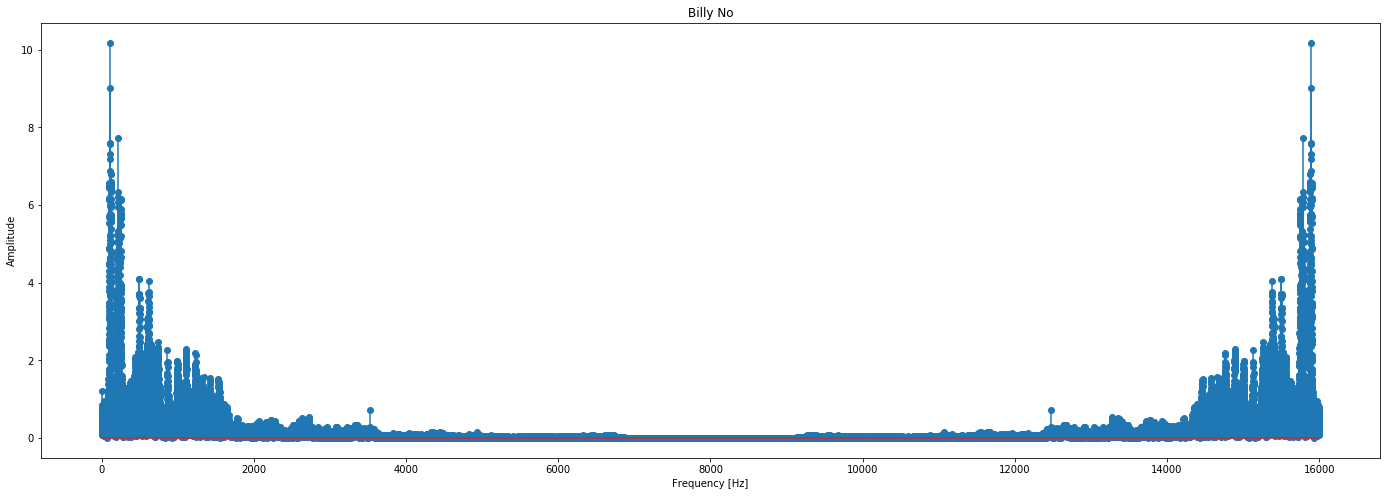

<Figure size 864x576 with 0 Axes>

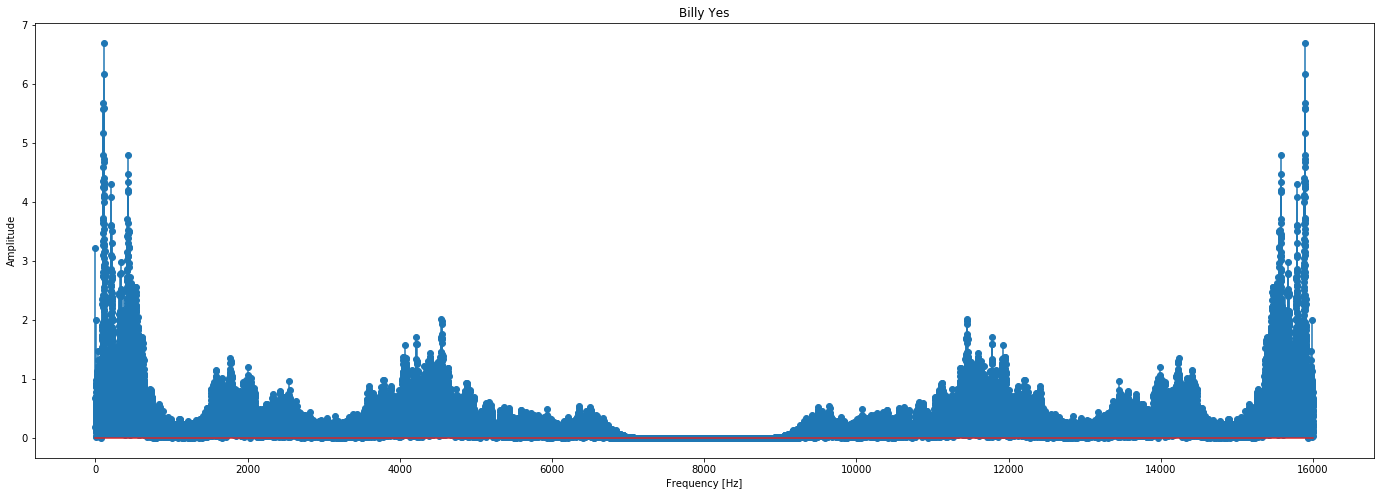

<Figure size 864x576 with 0 Axes>

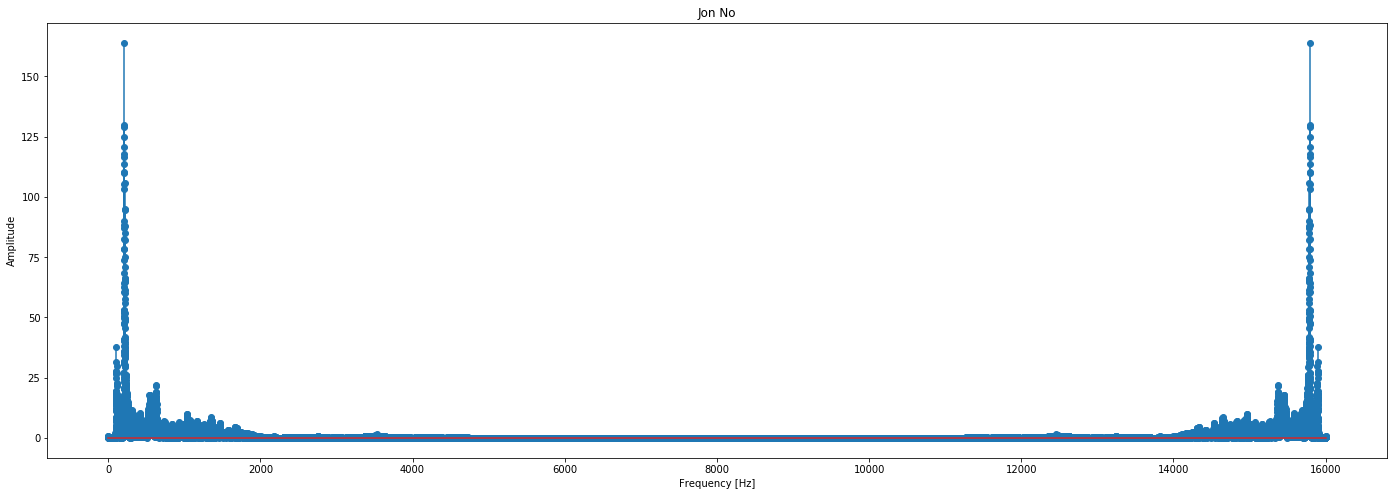

<Figure size 864x576 with 0 Axes>

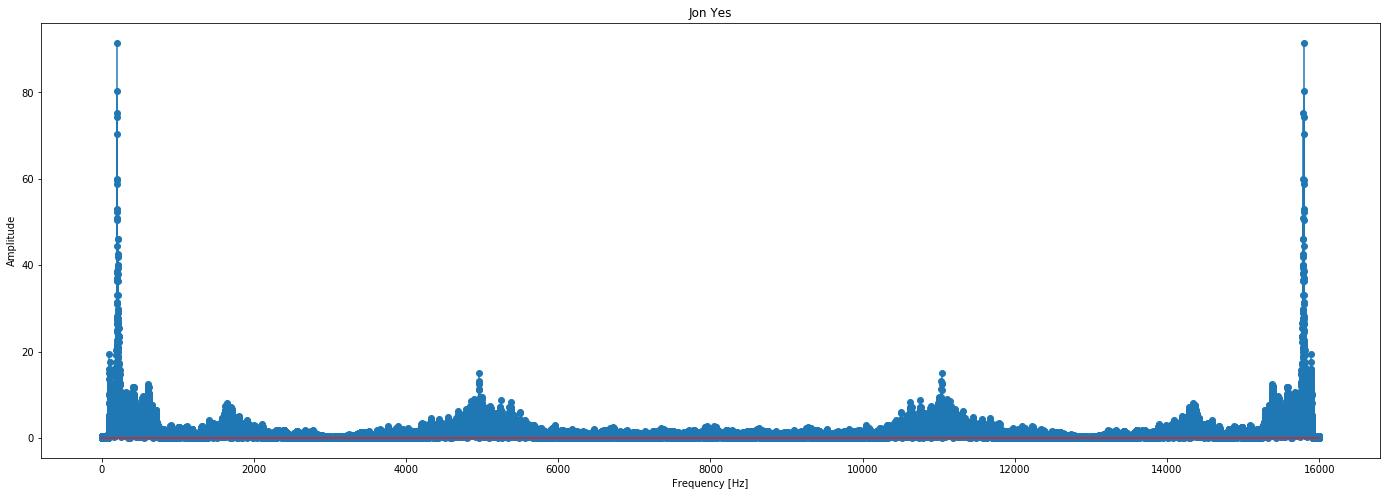

In [86]:
# FFTs of the testing data

N219 = len(A219)
f219 = np.linspace(0, 1 / Tsamp21, N219)

plt.figure(figsize=(12,8))
fft219 = np.fft.fft(A219) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Billy No")
plt.stem(f219,np.abs(fft219)/N219,use_line_collection=True)
plt.show()

N220 = len(A220)
f220 = np.linspace(0, 1 / Tsamp21, N220)

plt.figure(figsize=(12,8))
fft220 = np.fft.fft(A220) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Billy Yes")
plt.stem(f220,np.abs(fft220)/N220,use_line_collection=True)
plt.show()

N221 = len(A221)
f221 = np.linspace(0, 1 / Tsamp21, N221)

plt.figure(figsize=(12,8))
fft221 = np.fft.fft(A221) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Jon No")
plt.stem(f221,np.abs(fft221)/N221,use_line_collection=True)
plt.show()

N222 = len(A222)
Tsamp21=1/fs
f222 = np.linspace(0, 1 / Tsamp21, N222)

plt.figure(figsize=(12,8))
fft222 = np.fft.fft(A222) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Jon Yes")
plt.stem(f222,np.abs(fft222)/N222,use_line_collection=True)
plt.show()

<Figure size 864x576 with 0 Axes>

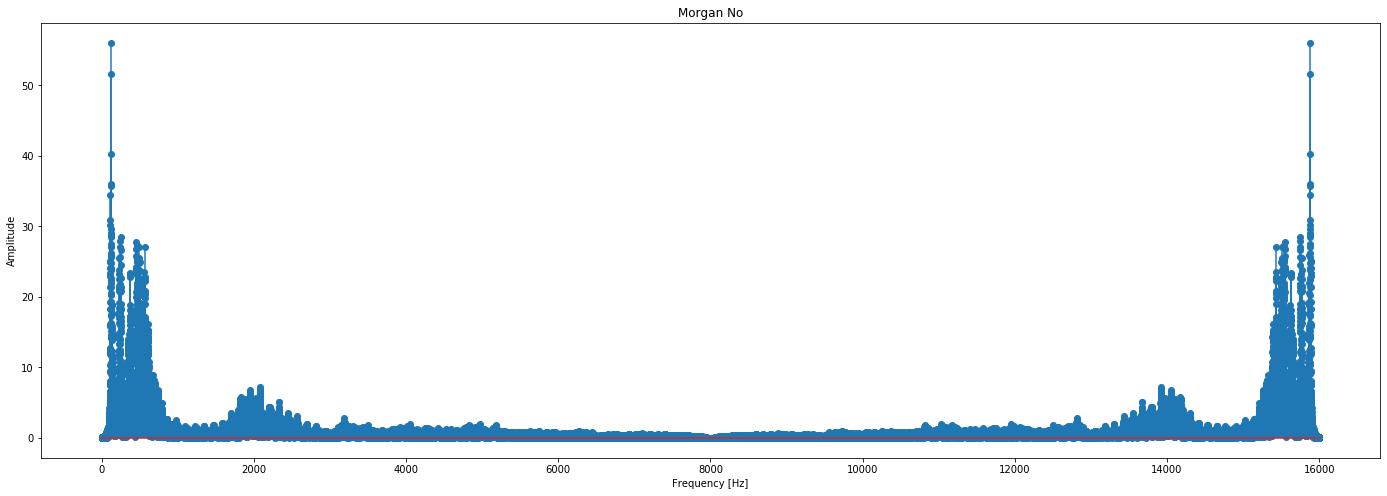

<Figure size 864x576 with 0 Axes>

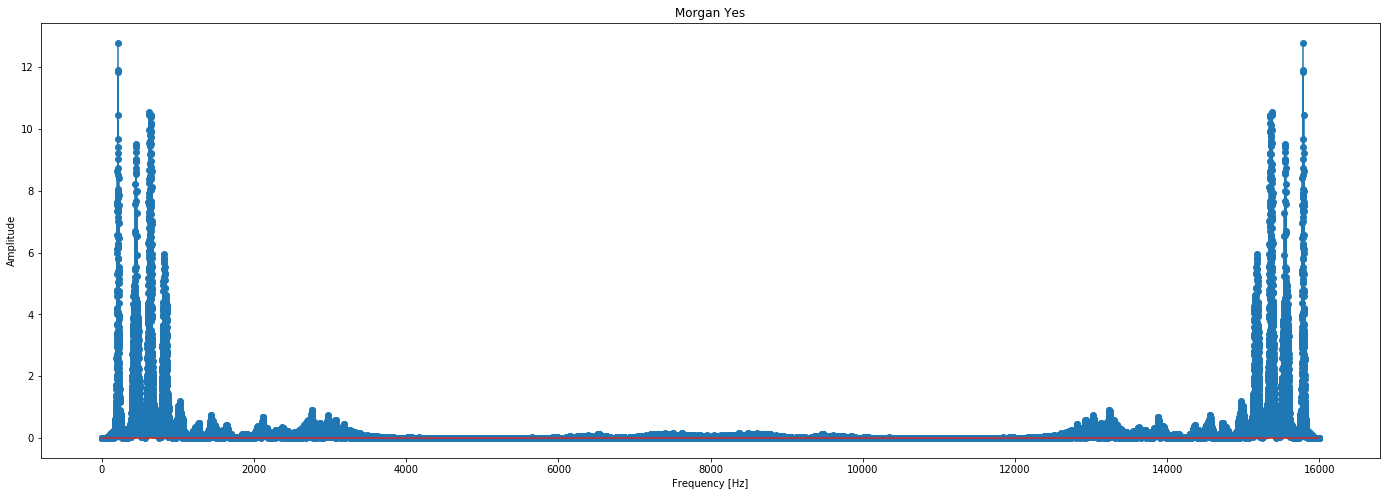

In [88]:
N223 = len(A223)
f223 = np.linspace(0, 1 / Tsamp21, N223)

plt.figure(figsize=(12,8))
fft223 = np.fft.fft(A223) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Morgan No")
plt.stem(f223,np.abs(fft223)/N223,use_line_collection=True)
plt.show()

N224 = len(A224)
Tsamp21=1/fs
f224 = np.linspace(0, 1 / Tsamp21, N224)

plt.figure(figsize=(12,8))
fft224 = np.fft.fft(A224) #xsamp is your stem plot data
plt.figure(figsize=(24,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Morgan Yes")
plt.stem(f224,np.abs(fft224)/N224,use_line_collection=True)
plt.show()

In [124]:
# Testing the data and they agree with the files

yes15=yesNo(fft215)
yes16=yesNo(fft216)
yes17=yesNo(fft217)
yes18=yesNo(fft218)
yes19=yesNo(fft219)
yes20=yesNo(fft220)
yes21=yesNo(fft21)
yes22=yesNo(fft22)
yes23=yesNo(fft23)
yes24=yesNo(fft24)

print(yes15[0],yes17[0],yes19[0],yes21[0],yes23[0])
print(yes16[0],yes18[0],yes20[0],yes22[0],yes24[0])

print(yes15[1],yes17[1],yes19[1],yes21[1],yes23[1])
print(yes16[1],yes18[1],yes20[1],yes22[1],yes24[1])

They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
They said No
They said Yes
19.50687698582674 4.818823375525861 22.70218047411731 151.75945506888533 16.689144046342395
3.935931025725595 0.4750978915874383 1.314859728931196 3.3394970067100047 2.5927082393224135
1.8049434829708793 1.3125758006637362 1.8312391552174712 1.9738150414441042 1.7738726085603285
1.1896159044459116 -0.7116844399359612 0.2720335275576903 1.0782341838662528 0.8866337777669355


# 2 e)

In [135]:
# The same function from 2b, except you can take in data from the wav directly.

def yesNo(list2):
    list1=np.fft.fft(list2)
    N=len(list1)
    
    
    # N/16000 is the ratio that finds the index of the frequency in the fft when multiplied by
    # the desired frequency
    n1=int(600*N/16000)     
    n2=int(1700*N/16000)
    n3=int(5500*N/16000)
    n4=int(7000*N/16000)
    
    
    # Using the sum of a range of frequencies (600-1700 Hz and 5500-7000 Hz), we could differ the Yes and No
    
    sum1=sum(np.abs(list1[n1:n2]))
    sum2=sum(np.abs(list1[n3:n4]))
    
    
    # Varying factor below
    
    percentDiff=((sum1-sum2)/((sum1+sum2)/2))
    if percentDiff> 1.28 :
        print("They said No")
    else: 
        print("They said Yes")
    
    return percentDiff